## Loading data and other prelim cleanining

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'..\data\german_credit_data.csv')

# Display basic information about the dataset
print("Dataset Information:")
df.info()

print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribu

In [50]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
class          0
dtype: int64


In [51]:
# Summary statistics
print(df.describe())


        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18        class  
count  1000.000000  1000.000000  1000.000000  
mean      1.407000     1.155000     1.300000  
std       0.577654     0.362086     0.458487  
min       1.000000     1.000000     1.000000  
25%       1.000000     1.000000     1.000000  
50%       1.000000     1.000000     1.0000

In [52]:
# Unique values in each column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Attribute1: ['A11' 'A12' 'A14' 'A13']
Attribute3: ['A34' 'A32' 'A33' 'A30' 'A31']
Attribute4: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Attribute6: ['A65' 'A61' 'A63' 'A64' 'A62']
Attribute7: ['A75' 'A73' 'A74' 'A71' 'A72']
Attribute9: ['A93' 'A92' 'A91' 'A94']
Attribute10: ['A101' 'A103' 'A102']
Attribute12: ['A121' 'A122' 'A124' 'A123']
Attribute14: ['A143' 'A141' 'A142']
Attribute15: ['A152' 'A153' 'A151']
Attribute17: ['A173' 'A172' 'A174' 'A171']
Attribute19: ['A192' 'A191']
Attribute20: ['A201' 'A202']


In [53]:
# Rename columns based on the provided table
df.columns = [
    "Status_Checking_Account", "Duration", "Credit_History", "Purpose", 
    "Credit_Amount", "Savings_Account_Bonds", "Employment_Since", 
    "Installment_Rate", "Personal_Status_Sex", "Other_Debtors_Guarantors",
    "Residence_Since", "Property", "Age", "Other_Installment_Plans", 
    "Housing", "Existing_Credits", "Job", "Liable_People", "Telephone", 
    "Foreign_Worker", "Class"
]


In [54]:
# Convert columns to their correct data types
df = df.astype({
    "Status_Checking_Account": "category",
    "Duration": "int",
    "Credit_History": "category",
    "Purpose": "category",
    "Credit_Amount": "int",
    "Savings_Account_Bonds": "category",
    "Employment_Since": "category",
    "Installment_Rate": "int",
    "Personal_Status_Sex": "category",
    "Other_Debtors_Guarantors": "category",
    "Residence_Since": "int",
    "Property": "category",
    "Age": "int",
    "Other_Installment_Plans": "category",
    "Housing": "category",
    "Existing_Credits": "int",
    "Job": "category",
    "Liable_People": "int",
    "Telephone": "category",
    "Foreign_Worker": "category",
    "Class": "category"
})


In [55]:
# Map Class to Good/Bad
df["Class"] = df["Class"].map({1: "Good", 2: "Bad"})


In [56]:
# Display data info
print(df.info())

# Display the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Status_Checking_Account   1000 non-null   category
 1   Duration                  1000 non-null   int32   
 2   Credit_History            1000 non-null   category
 3   Purpose                   1000 non-null   category
 4   Credit_Amount             1000 non-null   int32   
 5   Savings_Account_Bonds     1000 non-null   category
 6   Employment_Since          1000 non-null   category
 7   Installment_Rate          1000 non-null   int32   
 8   Personal_Status_Sex       1000 non-null   category
 9   Other_Debtors_Guarantors  1000 non-null   category
 10  Residence_Since           1000 non-null   int32   
 11  Property                  1000 non-null   category
 12  Age                       1000 non-null   int32   
 13  Other_Installment_Plans   1000 non-null   categor

In [57]:
# Save the updated dataset
df.to_csv(r'..\data\renamed_german_credit_data.csv', index=False)
print("Renamed and cleaned dataset saved to 'data\renamed_german_credit_data.csv'")


enamed_german_credit_data.csv'ved to 'data


In [58]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


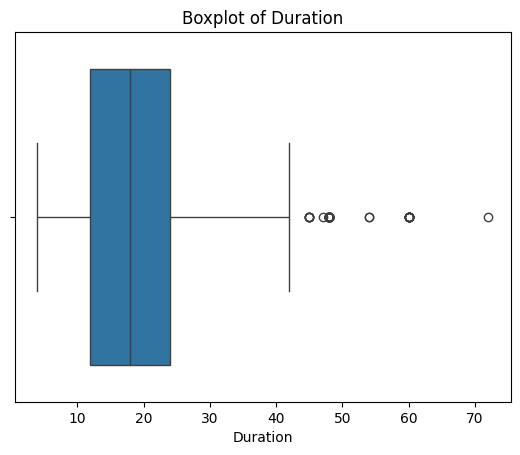

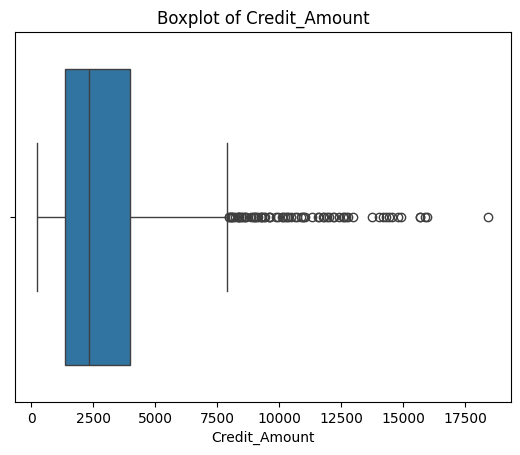

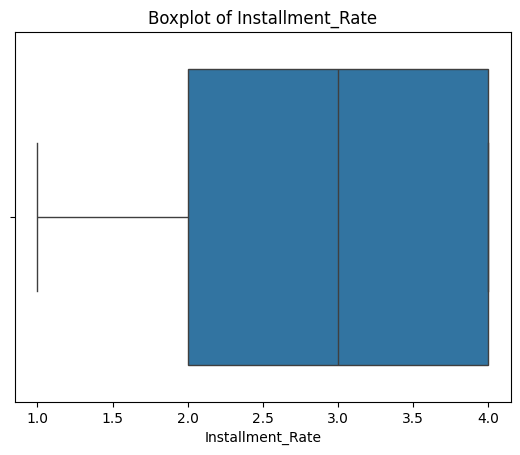

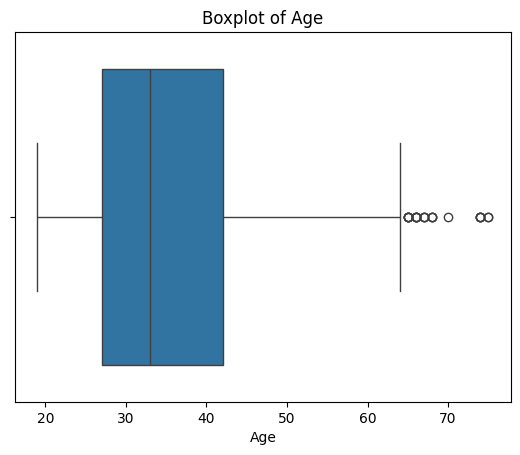

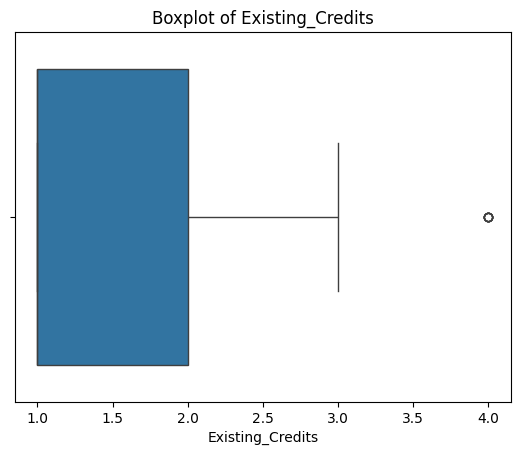

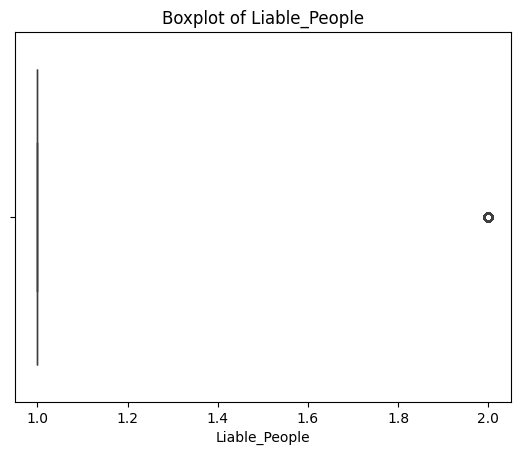

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical features
numerical_features = ["Duration", "Credit_Amount", "Installment_Rate", "Age", "Existing_Credits", "Liable_People"]
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


## Feature Engineering

In [60]:
# Create Debt to income ratio
df["Debt_To_Income_Ratio"] = df["Credit_Amount"] / df["Duration"]

#Create Age group bins
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 25, 40, 60, 100], labels=["Youth", "Adult", "Middle_Aged", "Senior"])




In [61]:
# Identify all categorical variables for one hot encoding
categorical_features = df.select_dtypes(include=['category', 'object']).columns
print("Categorical variables:", categorical_features)


Categorical variables: Index(['Status_Checking_Account', 'Credit_History', 'Purpose',
       'Savings_Account_Bonds', 'Employment_Since', 'Personal_Status_Sex',
       'Other_Debtors_Guarantors', 'Property', 'Other_Installment_Plans',
       'Housing', 'Job', 'Telephone', 'Foreign_Worker', 'Class', 'Age_Group'],
      dtype='object')


In [62]:
# One-hot encode all categorical features
# Identify categorical and numeric variables
categorical_variables = [
    "Status_Checking_Account", "Credit_History", "Purpose", 
    "Savings_Account_Bonds", "Employment_Since", "Personal_Status_Sex", 
    "Other_Debtors_Guarantors", "Property", "Other_Installment_Plans", 
    "Housing", "Job", "Telephone", "Foreign_Worker", "Age_Group"
]

numeric_variables = [
    "Duration", "Credit_Amount", "Installment_Rate", "Age", 
    "Existing_Credits", "Liable_People", "Debt_To_Income_Ratio"
]


In [63]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

print("One-hot encoding completed.")
print(f"Dataset shape after encoding: {df_encoded.shape}")



One-hot encoding completed.
Dataset shape after encoding: (1000, 53)


In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale numeric variables
df_encoded[numeric_variables] = scaler.fit_transform(df_encoded[numeric_variables])

print("Numeric variables scaled.")


Numeric variables scaled.


In [65]:
# Save the preprocessed dataset
df_encoded.to_csv(r'..\data\preprocessed_german_credit_data.csv', index=False)

print("Preprocessed dataset saved to 'data\preprocessed_german_credit_data.csv'")


Preprocessed dataset saved to 'data\preprocessed_german_credit_data.csv'


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\cyrch\AppData\Local\Temp\ipykernel_37644\1170378080.py:4: SyntaxWarning: invalid escape sequence '\p'
  print("Preprocessed dataset saved to 'data\preprocessed_german_credit_data.csv'")


## Training and testing data


In [66]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop(columns=["Class"])
y = df_encoded["Class"]


# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (800, 52)
Testing set size: (200, 52)


In [70]:
# Save feature names to a file
import pickle

feature_names = X.columns.tolist()  # X is the DataFrame used for training
with open(r'..\outputs\feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved.")



Feature names saved.


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

print("Logistic Regression model trained.")


Logistic Regression model trained.


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Good")
recall = recall_score(y_test, y_pred, pos_label="Good")
f1 = f1_score(y_test, y_pred, pos_label="Good")
auc = roc_auc_score(y_test.map({"Good": 1, "Bad": 0}), y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7200
Precision: 0.7800
Recall: 0.8357
F1-Score: 0.8069
AUC: 0.7590


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Encode target variable
y_encoded = y.map({"Good": 1, "Bad": 0})

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label="Good")
recall_rf = recall_score(y_test, y_pred_rf, pos_label="Good")
f1_rf = f1_score(y_test, y_pred_rf, pos_label="Good")
auc_rf = roc_auc_score(y_test.map({"Good": 1, "Bad": 0}), y_pred_proba_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-Score: {f1_rf:.4f}")
print(f"Random Forest - AUC: {auc_rf:.4f}")


Random Forest - Accuracy: 0.7450
Random Forest - Precision: 0.7697
Random Forest - Recall: 0.9071
Random Forest - F1-Score: 0.8328
Random Forest - AUC: 0.7677


## XG BOOST

In [42]:
# Encode target variable
y_train_encoded = y_train.map({"Good": 1, "Bad": 0})
y_test_encoded = y_test.map({"Good": 1, "Bad": 0})


In [43]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train the model
xgb.fit(X_train, y_train_encoded)

print("XGBoost model trained.")


C:\Users\cyrch\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model trained.


In [44]:
# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb)
recall_xgb = recall_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb)
auc_xgb = roc_auc_score(y_test_encoded, y_pred_proba_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1-Score: {f1_xgb:.4f}")
print(f"XGBoost - AUC: {auc_xgb:.4f}")


XGBoost - Accuracy: 0.7100
XGBoost - Precision: 0.7697
XGBoost - Recall: 0.8357
XGBoost - F1-Score: 0.8014
XGBoost - AUC: 0.7288


## The random forest is the best model

The data was unbalanced hence we put more weight on precision, recall and F1 statistics

For simplicity, we will not do any hyperparameter tuning

In [69]:
import pickle

# Save the Random Forest model
with open(r'..\outputs\random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Random Forest model saved to 'outputs/random_forest_model.pkl'")


Random Forest model saved to 'outputs/random_forest_model.pkl'
